In [1]:
!pip install pandas numpy scikit-learn nltk flask

In [2]:
import pandas as pd

# Load the dataset (Make sure file names match exactly)
df_fake = pd.read_csv('/content/Fake.csv')
df_real = pd.read_csv('/content/True.csv')

# Add labels: 1 for Fake News, 0 for Real News
df_fake['label'] = 1
df_real['label'] = 0

# Merge both datasets
df = pd.concat([df_fake, df_real], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset

# Display first few rows
df.head()

,title,text,subject,date,label
0,BLACK WOMAN IN CHARLESTON WARNS “There’s gonna...,All the progress that s been made with race re...,politics,"Jun 22, 2015",1
1,EYE-OPENING: Why Liberals Won’t Talk About Whi...,This is a story you will never find in the mai...,politics,"Jan 18, 2016",1
2,THE LEFT GOES BONKERS After Bill O’Reilly Says...,Maxine is the worst enemy of the black communi...,politics,"Mar 28, 2017",1
3,Five Things You Need to Know About CrowdStrike,. The Daily CallerThe Democratic Party and mai...,US_News,"August 19, 2017",1
4,Clinton: DNC should authorize additional Democ...,"ADEL, Iowa (Reuters) - U.S. Democratic preside...",politicsNews,"January 27, 2016",0


In [3]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)  # Apply text cleaning

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Keep only 5000 important words
X = tfidf.fit_transform(df['clean_text']).toarray()  # Convert text into numerical vectors
y = df['label']  # Target labels (Fake = 1, Real = 0)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print Model Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4305
           1       0.99      0.99      0.99      4675

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [8]:
def predict_news(news_text):
    cleaned_text = clean_text(news_text)  # Clean input text
    vectorized_text = tfidf.transform([cleaned_text]).toarray()  # Convert to numbers
    prediction = model.predict(vectorized_text)[0]  # Get prediction (0 or 1)
    return "Fake News" if prediction == 1 else "Real News"

# Example Test
news = "Breaking: Government introduces new policies to boost economy."
print(predict_news(news))

Fake News


In [10]:
import matplotlib.pyplot as plt

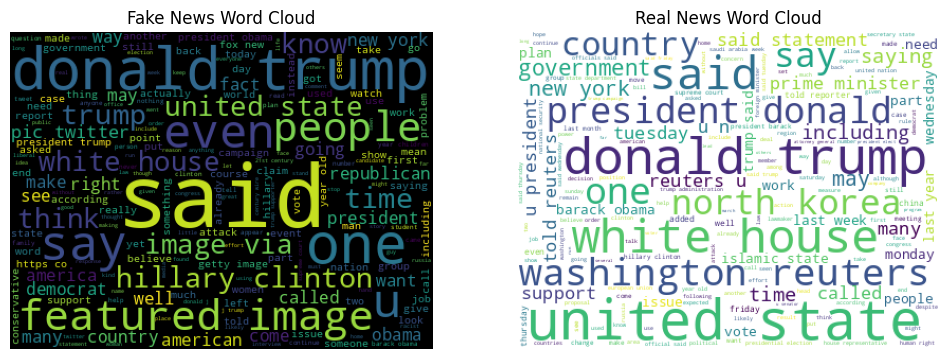

In [11]:
from wordcloud import WordCloud

# Combine all text data
fake_text = " ".join(df[df['label'] == 1]['clean_text'])  # Fake news text
real_text = " ".join(df[df['label'] == 0]['clean_text'])  # Real news text

# Create a figure with two subplots
plt.figure(figsize=(12,5))

# Fake News Word Cloud
plt.subplot(1,2,1)
plt.title("Fake News Word Cloud")
plt.imshow(WordCloud(width=400, height=300, background_color="black").generate(fake_text))
plt.axis("off")  # Hide axes

# Real News Word Cloud
plt.subplot(1,2,2)
plt.title("Real News Word Cloud")
plt.imshow(WordCloud(width=400, height=300, background_color="white").generate(real_text))
plt.axis("off")

plt.show()
